# **Titanic Survival Prediction🛳️**

*No Kaggle login required.Uplaod it at runtime*

Download the data from [link text](https://www.kaggle.com/competitions/titanic/data)

Extract the zip folder titanic.zip    
Then, Select all three files when first cell is executed to upload the files.

In [17]:
from google.colab import files
uploaded = files.upload()


Saving gender_submission.csv to gender_submission (1).csv
Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [18]:
# 2. Library Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=RuntimeWarning)


In [19]:
# Read uploaded files (change paths if filenames differ)
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')


In [20]:
# 4. Test Data Cleaning
print(test.info())
print(test.describe())

test.drop(['SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)
print(test.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209  

/tmp/ipython-input-20-3528860001.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Age'].fillna(test['Age'].mean(), inplace=True)


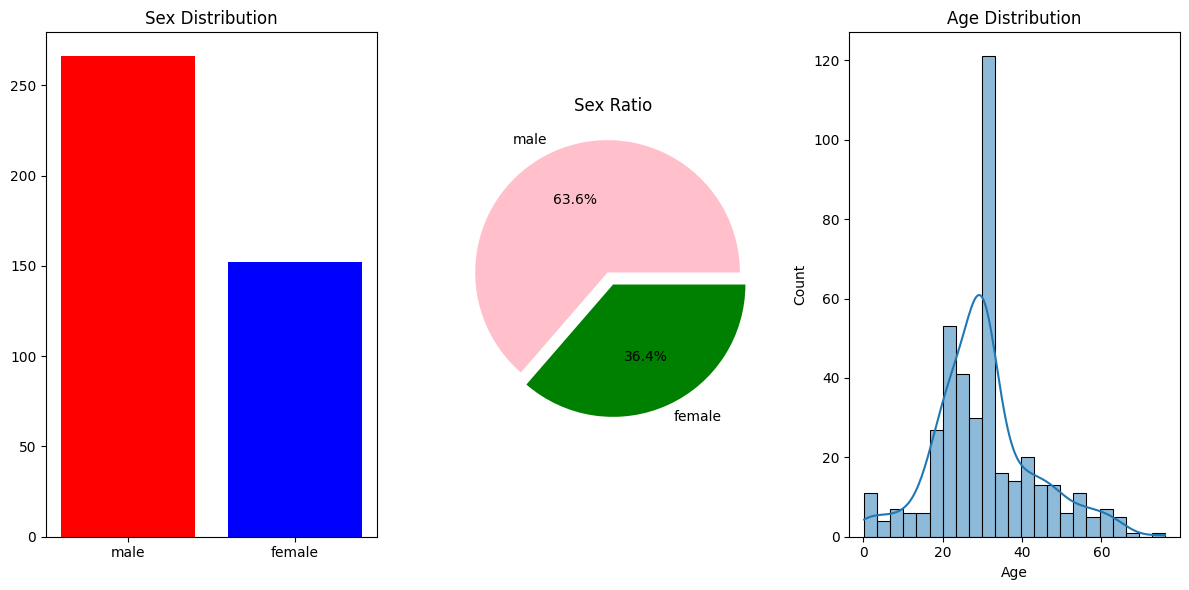

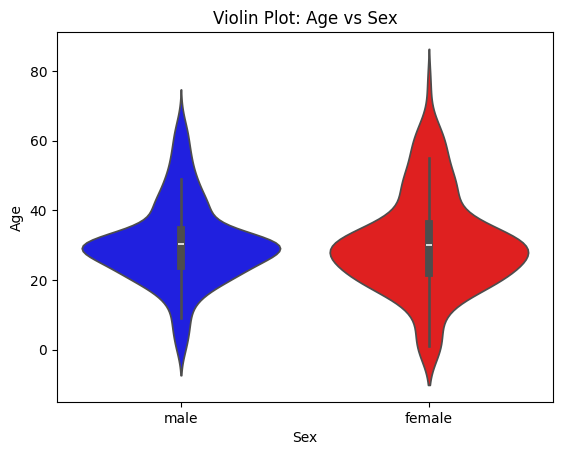

In [21]:
# 5. Test Data Visualization
plt.figure(figsize=(12, 6))
sex_counts = test['Sex'].value_counts()

plt.subplot(1, 3, 1)
plt.bar(sex_counts.index, sex_counts.values, color=['red', 'blue'])
plt.title("Sex Distribution")

plt.subplot(1, 3, 2)
plt.pie(sex_counts, labels=sex_counts.index, explode=[0.1, 0], colors=['pink', 'green'], autopct='%1.1f%%')
plt.title("Sex Ratio")

plt.subplot(1, 3, 3)
sns.histplot(test['Age'], kde=True)
plt.title("Age Distribution")

plt.tight_layout()
plt.show()

sns.violinplot(data=test, x="Sex", y="Age", hue="Sex", palette=['blue', 'red'], legend=False)
plt.title("Violin Plot: Age vs Sex")
plt.show()


In [22]:
# 6. Train Data Cleaning
print(train.info())
train.drop(['SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True)
train['Age'].fillna(train['Age'].mean(), inplace=True)
print(train.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
dtype: int64


/tmp/ipython-input-22-4167643249.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].mean(), inplace=True)


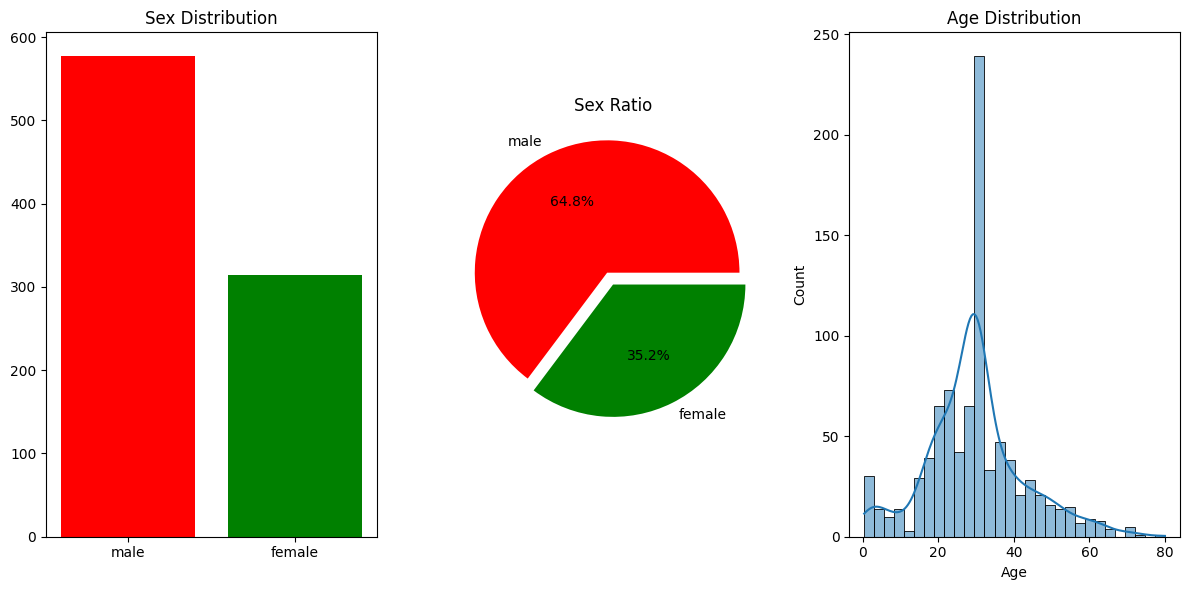

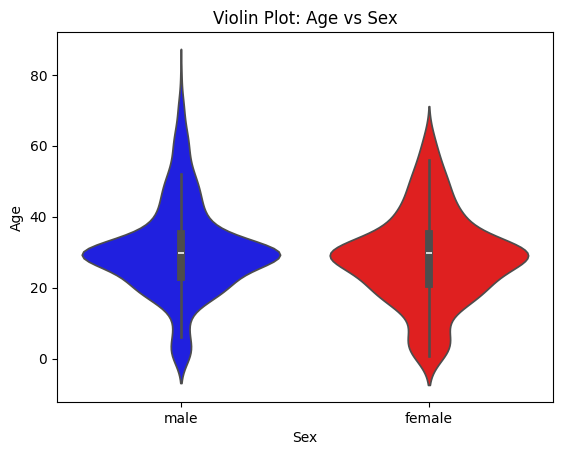

In [23]:
# 7. Train Data Visualization
plt.figure(figsize=(12, 6))
sex_counts = train['Sex'].value_counts()

plt.subplot(1, 3, 1)
plt.bar(sex_counts.index, sex_counts.values, color=['red', 'green'])
plt.title("Sex Distribution")

plt.subplot(1, 3, 2)
plt.pie(sex_counts, labels=sex_counts.index, explode=[0.1, 0], colors=['red', 'green'], autopct='%1.1f%%')
plt.title("Sex Ratio")

plt.subplot(1, 3, 3)
sns.histplot(train['Age'], kde=True)
plt.title("Age Distribution")

plt.tight_layout()
plt.show()

sns.violinplot(data=train, x="Sex", y="Age", hue="Sex", palette=['blue', 'red'], legend=False)
plt.title("Violin Plot: Age vs Sex")
plt.show()



Survival Count by Sex:
 Survived    0    1
Sex               
female     81  233
male      468  109

Survival Rate by Sex:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


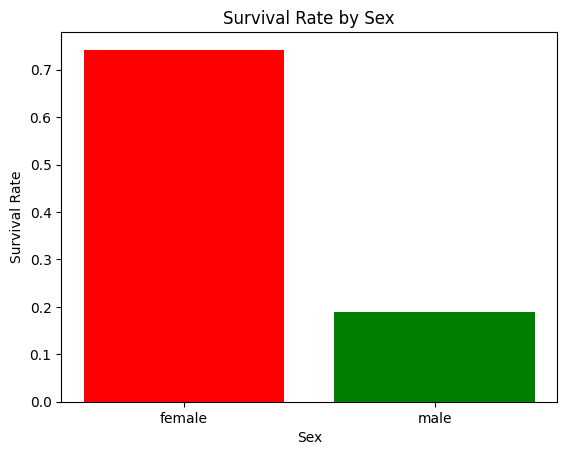

In [24]:
# 8. Survival Analysis
survival_by_sex = pd.crosstab(train['Sex'], train['Survived'])
print("\nSurvival Count by Sex:\n", survival_by_sex)

survival_rate_by_sex = train.groupby('Sex')['Survived'].mean()
print("\nSurvival Rate by Sex:\n", survival_rate_by_sex)

plt.bar(survival_rate_by_sex.index, survival_rate_by_sex.values, color=['red', 'green'])
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()


In [25]:
# 9. Model Training & Prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = train[['PassengerId', 'Pclass', 'Age']]
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy on Train Data: {accuracy:.4f}")



Model Accuracy on Train Data: 0.7399


In [26]:
# 10. Predictions on Test Dataset
X_final_test = test[['PassengerId', 'Pclass', 'Age']]
final_predictions = model.predict(X_final_test)

pred_df = pd.DataFrame(final_predictions, columns=['Survived'])
results = pd.concat([test[['PassengerId']], pred_df], axis=1)
print(results.head())

results.to_csv('results.csv', index=False)
print("✅ Predictions saved as 'results.csv'")


   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0
✅ Predictions saved as 'results.csv'


In [27]:
# 11. Accuracy Check (Optional)
gender_accuracy = accuracy_score(gender_submission['Survived'], pred_df)
print(f"Comparison Accuracy with Gender Submission: {gender_accuracy:.4f}")

merged_df = pd.merge(test, pred_df, left_index=True, right_index=True)
final_df = pd.concat([train, merged_df], ignore_index=True)
print("\nFinal Combined Dataset Shape:", final_df.shape)


Comparison Accuracy with Gender Submission: 0.6148

Final Combined Dataset Shape: (1309, 6)
